In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv('./Datasets/economic_index.csv')

In [68]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [69]:
df.drop(columns=['Unnamed: 0','year','month'],inplace=True,axis=1)

In [70]:
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


In [71]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

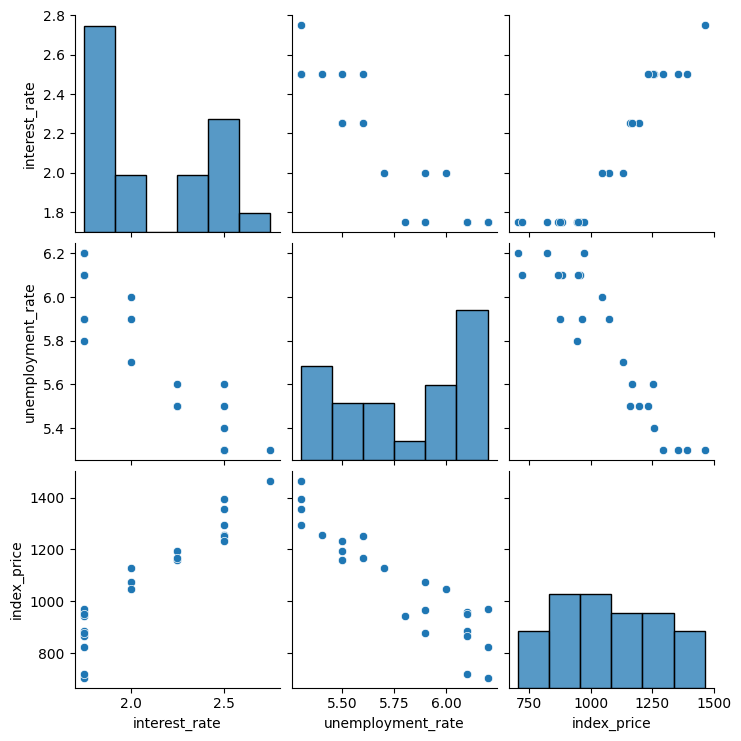

In [72]:
## Visualization 

import seaborn as sns

sns.pairplot(df)

In [73]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

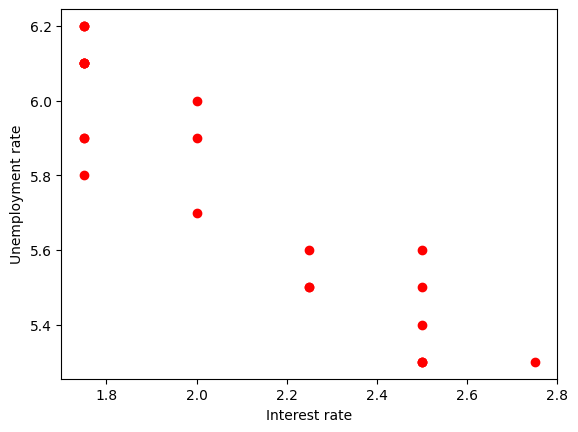

In [74]:
## Visulize the datapoints more closely

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')  ## inverse relationship
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

In [75]:
## Independent and dependent features

X = df.iloc[:,:-1]  # take all rows and remove last column
Y = df.iloc[:,-1]   # take last column 

In [76]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [77]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [78]:
## Train , test, split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

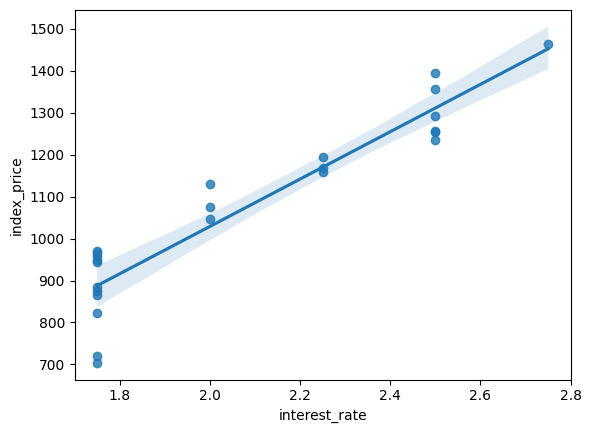

In [79]:
import seaborn as sns

sns.regplot(x='interest_rate', y='index_price', data=df)

# only create it for two features

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

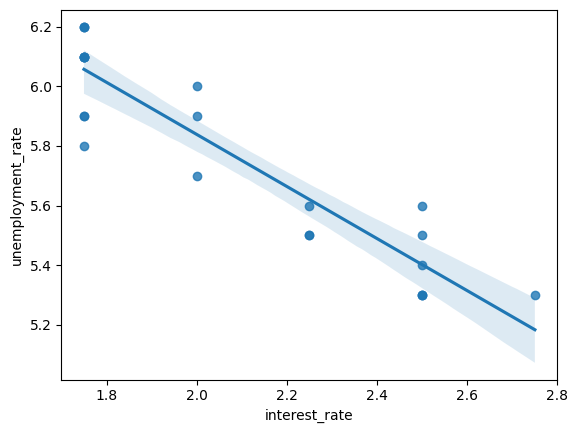

In [80]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [83]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [84]:
regression.fit(X_train,Y_train)

LinearRegression()

In [85]:
# Cross Validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',
                        cv=3)

In [86]:
score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [87]:
np.mean(score)

np.float64(-5914.828180162386)

In [88]:
# Prediction

Y_pred = regression.predict(X_test)
Y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse= mean_squared_error(Y_test,Y_pred)  
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [90]:
from sklearn.metrics import r2_score
r2score = r2_score(Y_test,Y_pred)

print(r2score)

0.7591371539010257


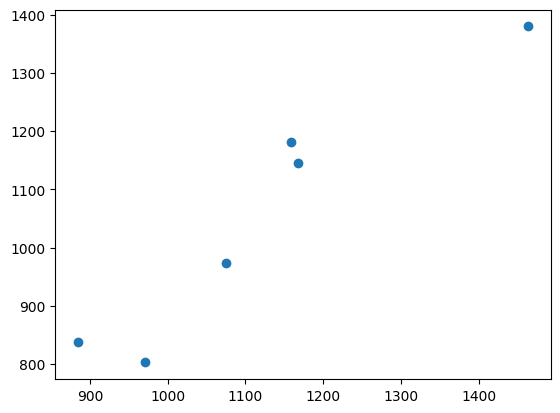

In [91]:
## Assumptions

plt.scatter(Y_test,Y_pred)

In [93]:
residuals = Y_test - Y_pred  # error 
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


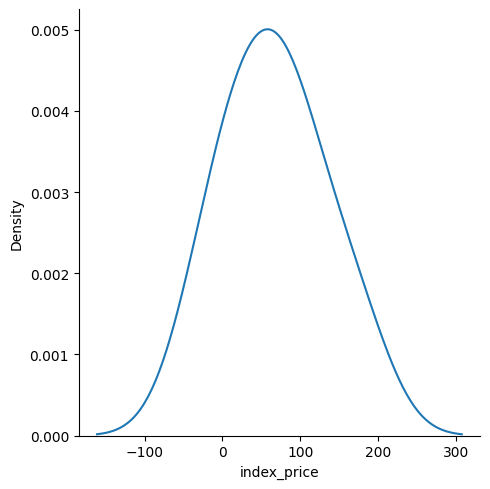

In [95]:
sns.displot(residuals, kind='kde')

# model is good if this curve appears

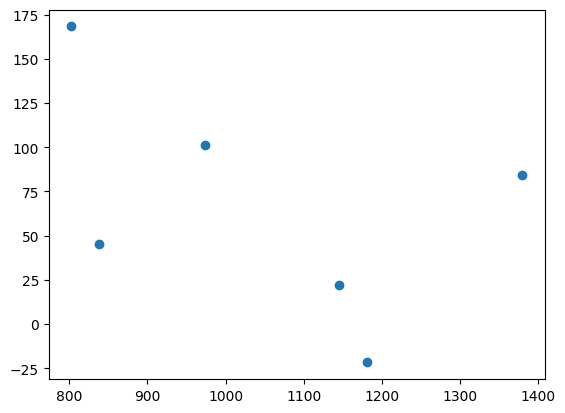

In [96]:
## scatter plot with respect to predictions and resudials

plt.scatter(Y_pred,residuals)

'''There is no pattern which can indicate errors but 
here it is uniform distribution so there is no such problem'''

In [97]:
## OLS LINEAR REGRESSION 

import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

prediction = model.predict(X_test)
prediction

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [99]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 19 Mar 2025   Prob (F-statistic):                       0.754
Time:                        23:05:00   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\aditya\ML\CODE\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [100]:
print(regression.coef_)

[  88.27275507 -116.25716066]
